# Task 2 — Deep Learning with TensorFlow 
### Dataset: MNIST Handwritten Digits
#### Objectives:
- Build and train a CNN to classify handwritten digits (0–9).
- Achieve >95% accuracy.
- Visualize model predictions on 5 test samples.
- Save trained model for later deployment.

In [9]:
# ============================
# 1 Import Dependencies
# ============================
# Import TensorFlow library for deep learning operations
import tensorflow as tf
# Import specific modules from TensorFlow Keras for building neural network layers and models
from tensorflow.keras import layers, models  # type: ignore
# Import ImageDataGenerator for data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # type: ignore
# Import matplotlib for plotting and visualization
import matplotlib.pyplot as plt
# Import NumPy for numerical operations and array handling
import numpy as np
# Print confirmation of successful imports and TensorFlow version
print('Libraries imported successfully! TensorFlow version:', tf.__version__)

Libraries imported successfully! TensorFlow version: 2.20.0


In [10]:
# ============================
# 2 Load and Preprocess Data
# ============================
# Load the MNIST dataset from Keras datasets
# MNIST contains 70,000 handwritten digit images (28x28 pixels)
# x_train, y_train: training images and labels
# x_test, y_test: test images and labels
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values from 0-255 to 0-1 for better neural network performance
# This also converts the data to float32 implicitly
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape images to include a channel dimension for CNN input
# Original shape: (num_samples, 28, 28) -> New shape: (num_samples, 28, 28, 1)
# CNNs expect 4D tensors: (batch_size, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Print the shapes of training and test sets to verify preprocessing
print('Train set:', x_train.shape, ' Test set:', x_test.shape)

Train set: (60000, 28, 28, 1)  Test set: (10000, 28, 28, 1)


In [11]:
# ============================
# 2.5 Data Augmentation for Robustness
# ============================
# To improve model robustness against varied handwriting styles,
# apply data augmentation techniques like rotation, shift, and zoom.
datagen = ImageDataGenerator(
    rotation_range=10,      # Rotate images by up to 10 degrees
    width_shift_range=0.1,  # Shift horizontally by up to 10%
    height_shift_range=0.1, # Shift vertically by up to 10%
    zoom_range=0.1          # Zoom in/out by up to 10%
)
# Fit the generator on training data to learn stats
datagen.fit(x_train)

In [12]:
# ============================
# 3 Build CNN Architecture
# ============================
# Create a Sequential model - layers are stacked sequentially
model = models.Sequential([
    # First convolutional layer: 32 filters of 3x3, ReLU activation
    # input_shape specifies the shape of input images (28x28x1)
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # First max pooling layer: 2x2 pool size reduces spatial dimensions by half
    layers.MaxPooling2D((2, 2)),
    # Second convolutional layer: 64 filters of 3x3, ReLU activation
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Second max pooling layer: 2x2 pool size further reduces dimensions
    layers.MaxPooling2D((2, 2)),
    # Flatten layer: converts 2D feature maps to 1D vector for dense layers
    layers.Flatten(),
    # First dense layer: 64 neurons with ReLU activation for feature processing
    layers.Dense(64, activation='relu'),
    # Dropout layer: randomly set 50% of inputs to zero during training to prevent overfitting
    layers.Dropout(0.5),
    # Output layer: 10 neurons (one for each digit 0-9) with softmax activation
    # Softmax converts outputs to probabilities that sum to 1
    layers.Dense(10, activation='softmax')
])

# Display a summary of the model architecture including layer details and parameters
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# ============================
# 4 Compile and Train the Model
# ============================
# Compile the model with:
# - Adam optimizer: adaptive learning rate optimization algorithm
# - Sparse categorical crossentropy: suitable for integer labels (0-9) without one-hot encoding
# - Accuracy metric: tracks percentage of correctly predicted labels
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model using data augmentation for more robust performance
# - Use datagen.flow to generate augmented batches on-the-fly
# - epochs increased to 15 for better convergence with augmentation
# - batch_size=128: process 128 samples at a time
# - validation_data: use fixed test set for validation (no augmentation)
# - verbose=1: show progress bar
history = model.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=15, validation_data=(x_test, y_test), verbose=1)

# Alternative pure augmentation (if pref train/test split):
# history = model.fit(datagen.flow(x_train, y_train, batch_size=128), epochs=15, validation_split=0.1, batch_size=128, verbose=1)

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 64s 122ms/step - accuracy: 0.7645 - loss: 0.7255 - val_accuracy: 0.9782 - val_loss: 0.0737
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 88ms/step - accuracy: 0.9028 - loss: 0.3163 - val_accuracy: 0.9819 - val_loss: 0.0538
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - accuracy: 0.9269 - loss: 0.2434 - val_accuracy: 0.9861 - val_loss: 0.0394
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 47s 101ms/step - accuracy: 0.9397 - loss: 0.2009 - val_accuracy: 0.9891 - val_loss: 0.0321
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 79ms/step - accuracy: 0.9492 - loss: 0.1742 - val_accuracy: 0.9907 - val_loss: 0.0266
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 82ms/step - accuracy: 0.9549 - loss: 0.1526 - val_accuracy: 0.9908 - val_loss: 0.0271
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 83ms/step - accuracy: 0.9587 - loss: 0.1373 - val_accuracy: 0.9896 - val_loss: 0.0282
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 61s 131ms/step - accuracy: 0.9619 - loss: 0.1300

In [14]:
# ============================
# 5 Evaluate Model Accuracy
# ============================
# Evaluate the trained model on the test set (unseen data)
# Returns loss value and computed metrics (accuracy in this case)
# verbose=0: silent evaluation, no progress bar shown
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

# Print the test accuracy as a percentage with 2 decimal places
print(f'\nTest Accuracy: {test_acc*100:.2f}%')


Test Accuracy: 99.33%


In [15]:
# ============================
# 6 Save Model for Deployment
# ============================
# Save the trained model to disk in HDF5 format
# This includes the model architecture, weights, and compilation configuration
# Can be loaded later for inference or further training
model.save('../../bonus/mnist_cnn_improved_model.h5')

# Confirm that the model has been saved successfully
print('Model saved to ../../bonus/mnist_cnn_improved_model.h5')

Model saved to ../../bonus/mnist_cnn_improved_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


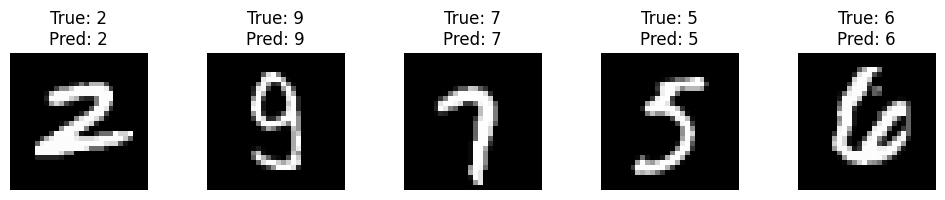

In [16]:
# ============================
# 7 Visualize Predictions on 5 Random Images
# ============================
# Select 5 random indices from the test set without replacement
indices = np.random.choice(len(x_test), 5, replace=False)

# Extract the corresponding images and true labels
images = x_test[indices]
labels = y_test[indices]

# Generate predictions for the selected images using the trained model
# Use argmax to convert softmax probabilities to class predictions (0-9)
predictions = np.argmax(model.predict(images), axis=1)

# Create a 1x5 subplot figure for visualization
plt.figure(figsize=(10, 2))
for i, idx in enumerate(indices):
    # Create subplot for each image
    plt.subplot(1, 5, i+1)

    # Display the image in grayscale
    plt.imshow(images[i].reshape(28, 28), cmap='gray')

    # Set title showing true label and predicted label
    plt.title(f'True: {labels[i]}\nPred: {predictions[i]}')

    # Turn off axis labels for cleaner visualization
    plt.axis('off')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()